Epoch 1/20


c:\Users\KatlegoRamahala\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4726 - loss: 0.7187 - val_accuracy: 0.7437 - val_loss: 0.6145
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6653 - loss: 0.6277 - val_accuracy: 0.7500 - val_loss: 0.5757
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7199 - loss: 0.6133 - val_accuracy: 0.7500 - val_loss: 0.5656
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7335 - loss: 0.5927 - val_accuracy: 0.7500 - val_loss: 0.5608
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7363 - loss: 0.5852 - val_accuracy: 0.7500 - val_loss: 0.5604
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7269 - loss: 0.5838 - val_accuracy: 0.7500 - val_loss: 0.5596
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7143 - loss: 0.6173 - val_accuracy: 0.7500 - val_loss: 0.5611
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7151 - loss: 0.6075 - val_accuracy: 0.7500 - val_loss: 0.5612
Epo

c:\Users\KatlegoRamahala\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\KatlegoRamahala\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\KatlegoRamahala\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

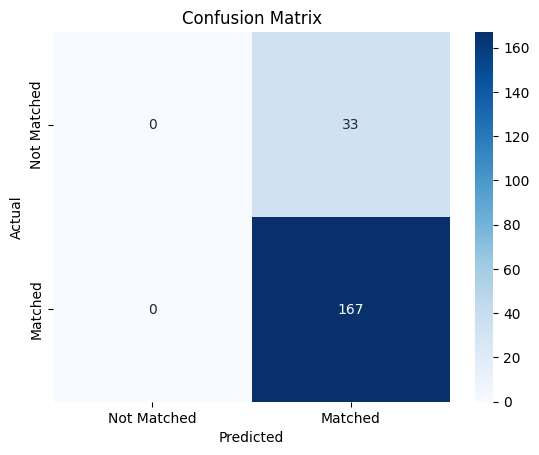

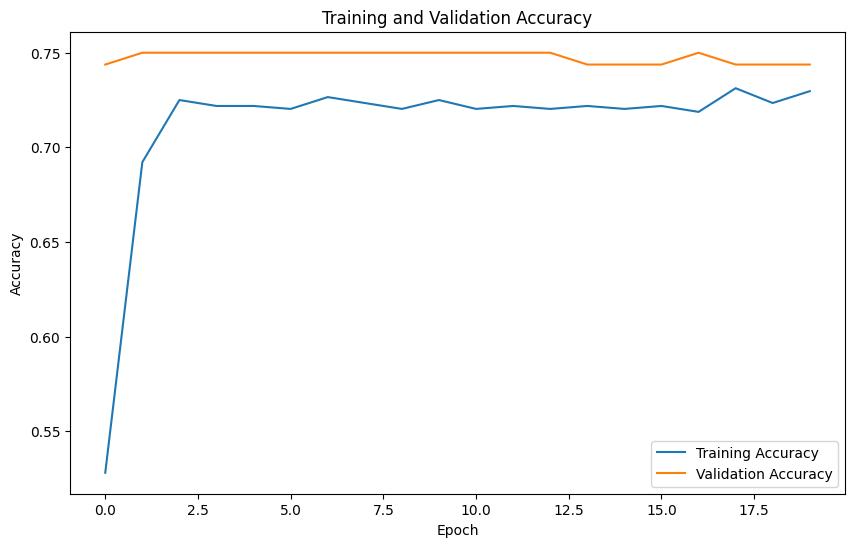

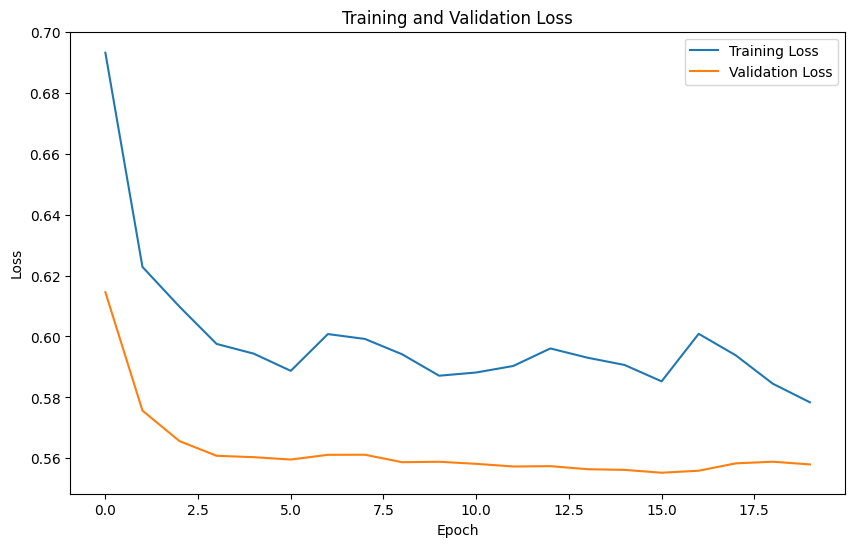

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report

# Generate synthetic data as before
np.random.seed(42)
n_samples = 1000

# Generate Grade 7 data
grade7_data = {
    "First Name": np.random.choice(["John", "Sarah", "Michael", "Emily", "Daniel"], n_samples),
    "Last Name": np.random.choice(["Smith", "Johnson", "Williams", "Brown", "Jones"], n_samples),
    "DOB": pd.date_range(start="2010-01-01", end="2010-12-31", periods=n_samples),
    "Gender": np.random.choice(["M", "F"], n_samples),
    "EMIScode": np.random.randint(1000, 9999, n_samples),
}
grade7_df = pd.DataFrame(grade7_data)

# Create Grade 8 data with mismatches
grade8_data = grade7_data.copy()
mismatch_idx = np.random.choice(n_samples, size=int(n_samples * 0.3), replace=False)
grade8_data["First Name"][mismatch_idx] = np.random.choice(
    ["John", "Sarah", "Michael", "Emily", "Daniel"], len(mismatch_idx)
)
grade8_data["EMIScode"] = np.random.randint(1000, 9999, n_samples)
grade8_df = pd.DataFrame(grade8_data)

# Add a target column for matches (1 = Matched, 0 = Not Matched)
matches = (
    (grade7_df["First Name"] == grade8_df["First Name"])
    & (grade7_df["Last Name"] == grade8_df["Last Name"])
    & (grade7_df["DOB"] == grade8_df["DOB"])
    & (grade7_df["Gender"] == grade8_df["Gender"])
)
grade7_df["Matched"] = matches.astype(int)

# Encode categorical variables
label_encoder = LabelEncoder()
grade7_df["First Name"] = label_encoder.fit_transform(grade7_df["First Name"])
grade7_df["Last Name"] = label_encoder.fit_transform(grade7_df["Last Name"])
grade7_df["Gender"] = label_encoder.fit_transform(grade7_df["Gender"])
grade7_df["DOB"] = grade7_df["DOB"].astype(int)  # Convert to numeric for modeling

# Features and target
X = grade7_df.drop(columns=["Matched"])
y = grade7_df["Matched"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build TensorFlow model
model = Sequential([
    Dense(64, activation="relu", input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation="relu"),
    Dropout(0.3),
    Dense(1, activation="sigmoid"),
])

model.compile(optimizer=Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])

# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=32, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4%}")

# Predict and analyze results
y_pred = (model.predict(X_test) > 0.5).astype(int)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Matched", "Matched"],
            yticklabels=["Not Matched", "Matched"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Training and Validation Accuracy Plot
plt.figure(figsize=(10, 6))
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Training and Validation Loss Plot
plt.figure(figsize=(10, 6))
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()